<a href="https://colab.research.google.com/github/mahir21/finbert-practice-1.0/blob/main/FinbertTest(OriginalCode_No_ML).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers
import torch
!pip install yfinance
!pip install pandas
!pip install numpy
!pip install matplotlib


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import pipeline

c:\Users\arman\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
stock_symbol = 'AAPL'
start_date = '2020-01-01'
end_date = '2021-12-31'

stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
tokenizer = BertTokenizer.from_pretrained('yiyanghkust/finbert-tone', do_lower_case=False)
model = BertForSequenceClassification.from_pretrained('yiyanghkust/finbert-tone')
sentiment_analyzer = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)

In [ ]:
news_headlines = [
    "Apple shutdowns",
    "Apple in huge loss",
    "Apple stocks price fall to 0",
]

sentiments = sentiment_analyzer(news_headlines)

[*********************100%%**********************]  1 of 1 completed
                 Date       Close
Date                             
2023-01-03 2023-01-03  124.538658
2023-01-04 2023-01-04  125.823189
2023-01-05 2023-01-05  124.488869
2023-01-06 2023-01-06  129.069336
2023-01-09 2023-01-09  129.597076
2023-01-10 2023-01-10  130.174622
2023-01-11 2023-01-11  132.922897
2023-01-12 2023-01-12  132.843246
2023-01-13 2023-01-13  134.187500
2023-01-17 2023-01-17  135.362488
2023-01-18 2023-01-18  134.635590
2023-01-19 2023-01-19  134.695343
2023-01-20 2023-01-20  137.284286
2023-01-23 2023-01-23  140.510529
2023-01-24 2023-01-24  141.924484
2023-01-25 2023-01-25  141.257339
2023-01-26 2023-01-26  143.348419
2023-01-27 2023-01-27  145.310028
2023-01-30 2023-01-30  142.392502
        Date                                    Sentiment Score
0 2023-01-03  {'label': 'Positive', 'score': 0.9999994039535...
1 2023-01-04   {'label': 'Neutral', 'score': 0.722366213798523}
2 2023-01-05  {'label': '

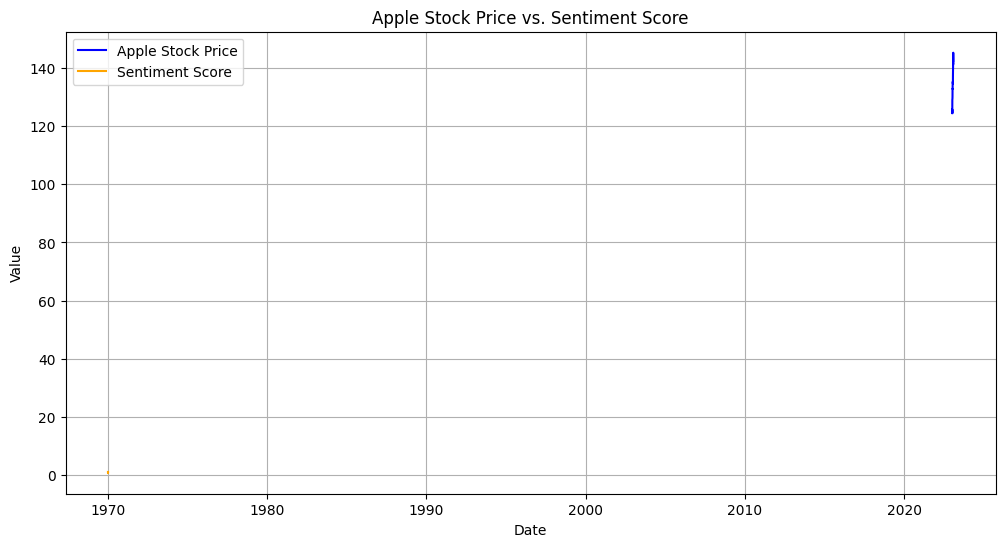

In [ ]:
import pandas as pd
import yfinance as yf
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import pipeline
import matplotlib.pyplot as plt

# Fetch Apple stock price data from Yahoo Finance
start_date = '2023-01-01'
end_date = '2023-01-31'
apple_data = yf.download('AAPL', start=start_date, end=end_date)

# Create a DataFrame with the Date and Close columns
stock_data = pd.DataFrame({
    'Date': apple_data.index,  # This assumes that 'Date' is already the index
    'Close': apple_data['Adj Close']
})

# Initialize the finbert-tone model
tokenizer = BertTokenizer.from_pretrained('yiyanghkust/finbert-tone', do_lower_case=False)
model = BertForSequenceClassification.from_pretrained('yiyanghkust/finbert-tone')
sentiment_analyzer = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)

# Example news headlines
news_headlines = [
    "Apple announces record earnings",
    "Apple's new product receives mixed reviews",
    "Investors worried about Apple's growth prospects"
]

# Analyze the sentiment of news headlines using 'finbert-tone'
sentiment_scores = [sentiment_analyzer(headline)[0] for headline in news_headlines]
print(stock_data)
#print(sentiment_scores)
# Create a DataFrame for sentiment data
sentiment_data = pd.DataFrame({
    'Date': stock_data.index[:len(sentiment_scores)],  # Use the DataFrame index
    'Sentiment Score': sentiment_scores
})
print(sentiment_data)

# Merge stock and sentiment data based on the Date
merged_data = pd.merge(stock_data, sentiment_data, left_index=True, right_index=True, how='outer')
#merged_data = stock_data.merge(sentiment_data, on='Date', how='inner')#
#print(merged_data)
# Visualize the data

def extract_score(x):
    if isinstance(x, dict) and 'score' in x:
        return x['score']
    else:
        return None

merged_data['Numeric Sentiment Score'] = merged_data['Sentiment Score'].apply(extract_score)


plt.figure(figsize=(12, 6))
plt.plot(merged_data.index, merged_data['Close'], label='Apple Stock Price', color='blue')
plt.plot(merged_data.index, merged_data['Numeric Sentiment Score'], label='Sentiment Score', color='orange')
plt.title('Apple Stock Price vs. Sentiment Score')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [ ]:
# !pip install finbert
# !git clone https://github.com/yya518/FinBERT.git
# from FinBERT.finbert import predict
# import os

# # Set the MODEL_DIR environment variable
# os.environ['MODEL_DIR'] = '/content/FinBERT/models/sentiment'
# import pandas as pd
# import numpy as np
# import yfinance as yf
# import matplotlib.pyplot as plt
# #from finbert import Finbert

# # Define the date range for stock data
# start_date = '2023-01-01'
# end_date = '2023-01-31'

# # Fetch Apple stock price data from Yahoo Finance
# apple_data = yf.download('AAPL', start=start_date, end=end_date)

# # Create a DataFrame with the Date and Close columns
# stock_data = pd.DataFrame({
#     'Date': apple_data.index,
#     'Close': apple_data['Adj Close']
# })

# # Simulate news headlines sentiment scores (you should replace this with actual sentiment analysis)
# news_headlines = [
#     "Apple announces record earnings",
#     "Apple's new product receives mixed reviews",
#     "Investors worried about Apple's growth prospects"
# ]
# finbert = Finbert()
# sentiment_scores = [finbert.predict(i) for i in news_headlines]

# # Create a DataFrame for sentiment data
# sentiment_data = pd.DataFrame({
#     'Date': stock_data['Date'].values[:len(sentiment_scores)],
#     'Sentiment Score': sentiment_scores
# })

# # Merge stock and sentiment data based on the Date
# merged_data = pd.merge(stock_data, sentiment_data, on='Date', how='inner')

# # Visualize the data
# plt.figure(figsize=(12, 6))
# plt.plot(merged_data['Date'], merged_data['Close'], label='Apple Stock Price', color='blue')
# plt.plot(merged_data['Date'], merged_data['Sentiment Score'], label='Sentiment Score', color='orange')
# plt.title('Apple Stock Price vs. Sentiment Score')
# plt.xlabel('Date')
# plt.ylabel('Value')
# plt.legend()
# plt.grid(True)

# # Show the plot
# plt.show()


In [ ]:
# import pandas as pd
# import numpy as np
# import yfinance as yf

# # Define the date range
# start_date = '2023-01-01'
# end_date = '2023-01-31'  # Adjust this to your desired end date

# # Fetch Apple stock price data from Yahoo Finance
# apple_data = yf.download('AAPL', start=start_date, end=end_date)
# # Example sentiment data as a list of dictionaries (you need to provide this data)

# # Initialize an empty list for sentiment scores
# average_sentiments = []

# # Iterate through the list of sentiments
# for sentiment in sentiments:
#     try:
#         # Calculate the average sentiment score for each sentiment
#         average_score = np.mean([s['score'] for s in sentiment])
#         average_sentiments.append(average_score)
#     except (TypeError, KeyError):
#         # Handle cases where sentiment is not as expected
#         average_sentiments.append(np.nan)  # Use NaN for missing or invalid data

# # Create a placeholder DataFrame for stock_data (replace with your actual data)
# stock_data = pd.DataFrame({
#     'Date': apple_data.index,  # Date as the index of apple_data
#     'Close': apple_data['Adj Close']  # Adjusted Close Price
#     # You can add more columns as needed
# })

# print(stock_data)

# #plt.figure(figsize=(12, 6))
# #plt.plot(stock_data['Date'], stock_data['Close'], label='Apple Stock Price')
#plt.title('Apple Stock Price in January 2023')
#plt.xlabel('Date')
#plt.ylabel('Stock Price (USD)')
#plt.legend()
#plt.grid(True)


#stock_data['Sentiment'] = average_sentiments


# Plot stock prices and sentiment scores
#plt.figure(figsize=(12, 6))
#plt.subplot(2, 1, 1)
#plt.plot(stock_data['Close'], label=f'{stock_symbol} Stock Price', color='b')
#plt.title(f'{stock_symbol} Stock Price')
#plt.legend(loc='upper left')

#plt.subplot(2, 1, 2)
#plt.plot(stock_data.index, stock_data['Sentiment'], label='Sentiment Score', color='g')
#plt.title('News Sentiment Score')
#plt.legend(loc='upper left')

#plt.tight_layout()
#plt.show()
